In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [ ]:
X_train

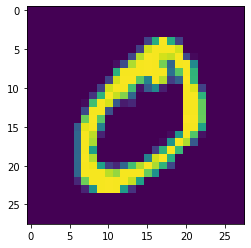

In [12]:
plt.imshow(X_train[1])

In [13]:
X_train = X_train / 255
X_test = X_test/ 255

In [31]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [32]:
cnn = keras.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3) , activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),

    
    layers.Flatten(),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [33]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3170 - accuracy: 0.9062
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0570 - accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0335 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0229 - accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0152 - accuracy: 0.9954


In [36]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0384 - accuracy: 0.9870


[0.03841443359851837, 0.9869999885559082]

In [37]:
y_pred = cnn.predict(X_test)

In [55]:
results = np.argmax(y_pred, axis=1)

In [69]:
results = pd.Series(results, name = 'Predicted')
results.head()

0    7
1    2
2    1
3    0
4    4
Name: Predicted, dtype: int64

In [39]:
y_org = [np.argmax(element) for element in y_pred]

In [40]:
y_org[:5], y_pred[:5]

([7, 2, 1, 0, 4],
 array([[1.37473206e-08, 3.96967259e-08, 1.66245229e-06, 2.85521395e-07,
         1.50524565e-10, 1.15604186e-10, 4.38571603e-14, 9.99995112e-01,
         1.18610004e-07, 2.89404215e-06],
        [6.90134527e-09, 3.52606480e-06, 9.99996424e-01, 6.19663210e-10,
         1.79075314e-11, 2.00797122e-11, 4.35011760e-09, 1.80636674e-13,
         1.43626666e-08, 2.32494302e-10],
        [1.95835764e-06, 9.99827981e-01, 2.24505402e-06, 8.52439275e-09,
         7.87438257e-05, 6.10132986e-07, 1.37749430e-06, 5.51468511e-05,
         3.18472266e-05, 1.15216459e-07],
        [9.99999166e-01, 2.83351898e-09, 1.98676474e-07, 1.76072834e-09,
         1.94121233e-10, 2.20772485e-08, 4.31629523e-08, 6.06712831e-07,
         2.46351028e-08, 1.23374146e-08],
        [6.77862886e-08, 3.62475525e-08, 1.54074282e-08, 1.33889311e-09,
         9.99968171e-01, 2.63820388e-09, 3.52452090e-09, 4.09093559e-08,
         1.82888627e-07, 3.14475110e-05]], dtype=float32))

In [41]:

print(classification_report(y_test,y_org))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



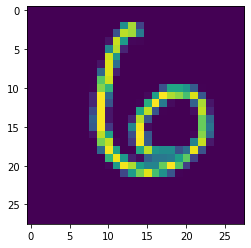

In [54]:
plt.imshow(X_test[100])

In [53]:
y_org[100]

6

In [71]:
submission = pd.concat([pd.Series(y_test, name = 'test'),results],axis = 1)
submission.to_csv("upload.csv", index=False)